<a href="https://colab.research.google.com/github/Neha9492/Real-Estate-Data-Science-Project/blob/main/Real_Estate_Dubai_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing libraries
* Pandas Library helps us create and handle dataset in dataframe(https://pandas.pydata.org/)
* Numpy
* Matplotlib Pyplot
* sklearn/sci-kit learn is an exhaustive library supporting various algorithms for classifiacation, regression and others
* GradientBoostingRegressor: regression algorithm for modelling(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
* train_test_split: splits datasets into randomized train and test sets(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* GridSearchCV: used for hyperparameter tuning(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

### Import cleaned dataset in a pandas dataframe

In [2]:
valDf = pd.read_csv('./valuation_cleaned_final.csv')

In [113]:
#Viewing a few rows from the dataframe
valDf.head()

,procedure_area,property_total_value,Year,Month,area_id_230.0,area_id_231.0,area_id_232.0,area_id_233.0,area_id_234.0,area_id_235.0,area_id_237.0,area_id_238.0,area_id_239.0,area_id_240.0,area_id_242.0,area_id_244.0,area_id_247.0,area_id_248.0,area_id_249.0,area_id_254.0,area_id_255.0,area_id_264.0,area_id_266.0,area_id_267.0,area_id_269.0,area_id_271.0,area_id_276.0,area_id_278.0,area_id_295.0,area_id_297.0,area_id_298.0,area_id_299.0,area_id_300.0,area_id_301.0,area_id_303.0,area_id_304.0,area_id_305.0,area_id_306.0,area_id_307.0,area_id_308.0,...,area_id_476.0,area_id_477.0,area_id_478.0,area_id_479.0,area_id_480.0,area_id_481.0,area_id_482.0,area_id_483.0,area_id_484.0,area_id_485.0,area_id_489.0,area_id_492.0,area_id_493.0,area_id_497.0,area_id_499.0,area_id_500.0,area_id_502.0,area_id_503.0,area_id_504.0,area_id_506.0,area_id_507.0,area_id_508.0,area_id_509.0,area_id_514.0,area_id_522.0,area_id_523.0,area_id_524.0,area_id_525.0,area_id_526.0,area_id_527.0,area_id_528.0,area_id_531.0,property_type_id_1,property_type_id_2,property_type_id_3,property_category_1,property_category_2,property_category_3,row_status_1,row_status_3
0,236.44,1400000.0,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,7432.26,15450000.0,2012,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,3135.48,2531250.0,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,2181.36,6000000.0,2012,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,142436.93,76658950.0,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


###Declaring the label or target variable and the feature variable in the dataset

In [3]:
label = valDf['property_total_value']
features = valDf.drop(['property_total_value'], axis=1)

###Train-Test split
Using train_test_split function to split the features and label rows into TRAIN and TEST sets in randomized state and given ratio


In [4]:
trainF, testF, trainL, testL = train_test_split(features, label, test_size=0.4, random_state=0)

###Model selection and Hyperparameter tuning
Creating a basic model with default parameters, this is done to observe its performance and provide a direction for further hyperparameter tuning


In [5]:
gbModel = GradientBoostingRegressor()

##### Fitting the model of the train set (i.e, let the model learn the parameters)

In [6]:
gbModel.fit(trainF, trainL)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

##### Measuring the Mean Squared Absolute Error for Training Data
######Mean Squared Absolute Error is a metric to evaluate the model. It compares the predicted value and the original values.
######.predict() method is how the model adjusts the parameters

In [7]:
# Measure the Mean Squared Absolute Error for Test Data
msae = mean_absolute_error(testL, gbModel.predict(testF))
print(msae)

11014454.508181963


#####Defining a function to format and print results from the gridSearch

In [87]:
def printResults(results):
    print('Best ML Params: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stnDvs = results.cv_results_['std_test_score']

    for mean, stnDvs, params in zip(means, stnDvs, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(
                round(mean, 3),
                round(stnDvs*2, 3),
                params
            )
        )

##### Running the gridSearch with various parameters to find the best combination for our model

In [88]:
gbModel = GradientBoostingRegressor()

parameters = {
    'n_estimators':[500,1000,1500],      # Number of decision trees 
    'learning_rate':[0.05,0.1,0.2],      # How much time spent learning the parameters
    'max_depth':[5,6,7],                 # Max depth for any decision tree
    'min_samples_leaf':[50],             # Minimum number of types of house to sample
    'max_features':['sqrt'],             # Max percentage of features to take into account by a tree
    'loss':['huber']                     # Function to minimise loss
}

gridSearch = GridSearchCV(gbModel, parameters, cv=5)
gridSearch.fit(trainF, trainL.values.ravel())

printResults(gridSearch)

Best ML Params: {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1500}

0.236 (+/-0.16) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 500}
0.249 (+/-0.17) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1000}
0.253 (+/-0.173) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1500}
0.24 (+/-0.159) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 500}
0.252 (+/-0.173) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 50, 'n_estimators': 1000}
0.255 (+/-0.173) for {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 

#####Since we found the hyperparameters, running the model with them finally.

In [9]:
gbModelbest = GradientBoostingRegressor(
    n_estimators=1500,      # Number of decision trees 
    learning_rate=0.2,      # How much time spent learning the parameters
    max_depth=6,            # Max depth for any decision tree
    min_samples_leaf=50,     # Minimum number of types of house to sample
    max_features='sqrt',   # Max percentage of features to take into account by a tree
    loss='huber'            # The function with which to calculate the errors made by the model
)

In [10]:
gbModelbest.fit(trainF, trainL)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='huber',
                          max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
msae = mean_absolute_error(trainL, gbModelbest.predict(trainF))
print(msae)

9684394.693166891


In [12]:
msae = mean_absolute_error(testL, gbModelbest.predict(testF))
print(msae)

9047223.297105655


In [13]:
print("Model Accuracy: %.3f" % gbModelbest.score(trainF, trainL))

Model Accuracy: 0.244


In [14]:
print("Model Accuracy: %.3f" % gbModelbest.score(testF, testL))

Model Accuracy: 0.377


##### Calculating the feature variance of the model, lets us compare the predicted labels and the original values for the test set, visualizing the same helps us understand the fitting of the model.

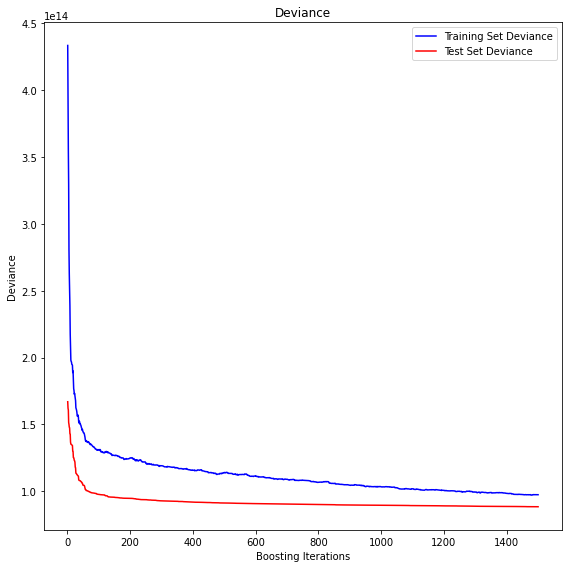

In [17]:
gbr_params ={
    "n_estimators" :1500,      # Number of decision trees 
    "learning_rate":0.2,      # How much time spent learning the parameters
    "max_depth":6,            # Max depth for any decision tree
    "min_samples_leaf":50,     # Minimum number of types of house to sample
    "max_features":'sqrt'}
test_score = np.zeros((gbr_params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gbModelbest.staged_predict(testF)):
    test_score[i] = gbModelbest.loss_(testL, y_pred)
 
fig = plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, gbModelbest.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(gbr_params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

##### Observation from the graph:

##Sample prediction

##### Importing the sample dataset from a csv file

In [18]:
sampleDf = pd.read_csv('./sampleML2.csv')

In [19]:
sampleDf.head()

,procedure_area,Year,Month,area_id_230.0,area_id_231.0,area_id_232.0,area_id_233.0,area_id_234.0,area_id_235.0,area_id_237.0,area_id_238.0,area_id_239.0,area_id_240.0,area_id_242.0,area_id_244.0,area_id_247.0,area_id_248.0,area_id_249.0,area_id_254.0,area_id_255.0,area_id_264.0,area_id_266.0,area_id_267.0,area_id_269.0,area_id_271.0,area_id_276.0,area_id_278.0,area_id_295.0,area_id_297.0,area_id_298.0,area_id_299.0,area_id_300.0,area_id_301.0,area_id_303.0,area_id_304.0,area_id_305.0,area_id_306.0,area_id_307.0,area_id_308.0,area_id_309.0,...,area_id_476.0,area_id_477.0,area_id_478.0,area_id_479.0,area_id_480.0,area_id_481.0,area_id_482.0,area_id_483.0,area_id_484.0,area_id_485.0,area_id_489.0,area_id_492.0,area_id_493.0,area_id_497.0,area_id_499.0,area_id_500.0,area_id_502.0,area_id_503.0,area_id_504.0,area_id_506.0,area_id_507.0,area_id_508.0,area_id_509.0,area_id_514.0,area_id_522.0,area_id_523.0,area_id_524.0,area_id_525.0,area_id_526.0,area_id_527.0,area_id_528.0,area_id_531.0,property_type_id_1,property_type_id_2,property_type_id_3,property_category_1,property_category_2,property_category_3,row_status_1,row_status_3
0,236.44,2022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


######Using the model to predict the target variable, property_total_value for the sample dataset

In [20]:
val = gbModelbest.predict(sampleDf)

In [21]:
print(val)

[1827299.71557244]
